This data provided with daily historical sales data between January 1th in 2010 and December 31th in 2011. The task is to forecast the Total Value of Sales in Dollars given some info about the Stores, Products and Accountability.

variables
Area Code - Store's Code;

State - Store's State;

Market - Store's Region;

Market Size - Store's Size;

Profit - Profits in Dollars;

Margin - Profit + Total Expenses OR Sales - COGS;

🌟 Sales 🌟 - Values Acquired in Sales (this is your target);

COGS - Cost of Goods Sold;

Total Expenses- Total Expenses to get the Product to Sell;

Marketing - Expenses in Marketing;

Inventory - Inventory Value of the Product in the Sale Moment;

Budget Profit - Expected Profit;

Budget COGS - Expected COGS;

Budget Margin - Expected Profit + Expected Total Expenses OR Expected Sales - Expected COGS;

Budget Sales - Expected Value Acquired in Sales;

ProductID - Product ID;

Date- Sale Date;

Product Type - Product Category;

Product - Product Description;

Type - Type.

# 1 Data Exploration

## 1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing dataset

In [2]:
dataset=pd.read_csv("sales.csv")

In [3]:
dataset["Product Type"].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

## 3 for first 5 rows

In [4]:
dataset.head()

Area Code        State Market   Market Size  Profit  Margin  Sales  COGS  \
0        203  Connecticut   East  Small Market     107     176    292   116   
1        203  Connecticut   East  Small Market      75     135    225    90   
2        203  Connecticut   East  Small Market     122     195    325   130   
3        203  Connecticut   East  Small Market     105     174    289   115   
4        203  Connecticut   East  Small Market     104     135    223    90   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              69         38        962            110          110   
1              60         29       1148             90           80   
2              73         42       1134            130          110   
3              69         37       1166            110          100   
4              56         29       1148             90           80   

   Budget Margin  Budget Sales  ProductId              Date Product Type  \
0            160           270          2  04-01-2010 00:00       Coffee   
1            130           210          2  07-01-2010 00:00       Coffee   
2            180           290          2  11-01-2010 00:00       Coffee   
3            160           260          2  12-01-2010 00:00       Coffee   
4            130           210          2  07-01-2011 00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

## 4.to get column names

In [5]:
dataset.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

## 5.to get basic information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   State           4248 non-null   object
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Profit          4248 non-null   int64 
 5   Margin          4248 non-null   int64 
 6   Sales           4248 non-null   int64 
 7   COGS            4248 non-null   int64 
 8   Total Expenses  4248 non-null   int64 
 9   Marketing       4248 non-null   int64 
 10  Inventory       4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget COGS     4248 non-null   int64 
 13  Budget Margin   4248 non-null   int64 
 14  Budget Sales    4248 non-null   int64 
 15  ProductId       4248 non-null   int64 
 16  Date            4248 non-null   object
 17  Product Type    4248 non-null   object
 18  Product 

## 6. size of dataset

In [7]:
print("size of data is: ",dataset.shape)

size of data is:  (4248, 20)


### .To get frequency of categories values inside a column

In [8]:
dataset["Market Size"].value_counts()

Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64

In [9]:
dataset["Sales"].value_counts()

43     52
114    52
129    46
109    45
150    45
       ..
796     1
638     1
494     1
658     1
659     1
Name: Sales, Length: 432, dtype: int64

## 7.check null values

In [10]:
dataset.isna()

Area Code  State  Market  Market Size  Profit  Margin  Sales   COGS  \
0         False  False   False        False   False   False  False  False   
1         False  False   False        False   False   False  False  False   
2         False  False   False        False   False   False  False  False   
3         False  False   False        False   False   False  False  False   
4         False  False   False        False   False   False  False  False   
...         ...    ...     ...          ...     ...     ...    ...    ...   
4243      False  False   False        False   False   False  False  False   
4244      False  False   False        False   False   False  False  False   
4245      False  False   False        False   False   False  False  False   
4246      False  False   False        False   False   False  False  False   
4247      False  False   False        False   False   False  False  False   

      Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              False      False      False          False        False   
1              False      False      False          False        False   
2              False      False      False          False        False   
3              False      False      False          False        False   
4              False      False      False          False        False   
...              ...        ...        ...            ...          ...   
4243           False      False      False          False        False   
4244           False      False      False          False        False   
4245           False      False      False          False        False   
4246           False      False      False          False        False   
4247           False      False      False          False        False   

      Budget Margin  Budget Sales  ProductId   Date  Product Type  Product  \
0             False         False      False  False         False    False   
1             False         False      False  False         False    False   
2             False         False      False  False         False    False   
3             False         False      False  False         False    False   
4             False         False      False  False         False    False   
...             ...           ...        ...    ...           ...      ...   
4243          False         False      False  False         False    False   
4244          False         False      False  False         False    False   
4245          False         False      False  False         False    False   
4246          False         False      False  False         False    False   
4247          False         False      False  False         False    False   

       Type  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
4243  False  
4244  False  
4245  False  
4246  False  
4247  False  

[4248 rows x 20 columns]

In [11]:
dataset.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

## 8. Assessing the linear relationship

In [12]:
dataset.corr()

Area Code    Profit    Margin     Sales      COGS  \
Area Code        1.000000  0.013979  0.029278  0.055220  0.080471   
Profit           0.013979  1.000000  0.920604  0.797331  0.464838   
Margin           0.029278  0.920604  1.000000  0.938809  0.678797   
Sales            0.055220  0.797331  0.938809  1.000000  0.886651   
COGS             0.080471  0.464838  0.678797  0.886651  1.000000   
Total Expenses   0.044552  0.199976  0.521254  0.689350  0.782534   
Marketing        0.051232  0.225465  0.531947  0.710515  0.818271   
Inventory        0.067998 -0.091545  0.061259  0.325934  0.621086   
Budget Profit    0.011994  0.937606  0.922812  0.815435  0.514967   
Budget COGS      0.063720  0.479862  0.680549  0.862882  0.947762   
Budget Margin    0.022871  0.876844  0.963460  0.920757  0.688587   
Budget Sales     0.042572  0.758830  0.901981  0.956538  0.849901   
ProductId        0.024297 -0.058693 -0.079595 -0.048077  0.002142   

                Total Expenses  Marketing  Inventory  Budget Profit  \
Area Code             0.044552   0.051232   0.067998       0.011994   
Profit                0.199976   0.225465  -0.091545       0.937606   
Margin                0.521254   0.531947   0.061259       0.922812   
Sales                 0.689350   0.710515   0.325934       0.815435   
COGS                  0.782534   0.818271   0.621086       0.514967   
Total Expenses        1.000000   0.966167   0.433708       0.255811   
Marketing             0.966167   1.000000   0.497764       0.279315   
Inventory             0.433708   0.497764   1.000000      -0.019275   
Budget Profit         0.255811   0.279315  -0.019275       1.000000   
Budget COGS           0.744259   0.773709   0.579876       0.579176   
Budget Margin         0.530776   0.543039   0.119373       0.949637   
Budget Sales          0.661217   0.681946   0.332216       0.848285   
ProductId            -0.073369  -0.042227   0.067457      -0.147758   

                Budget COGS  Budget Margin  Budget Sales  ProductId  
Area Code          0.063720       0.022871      0.042572   0.024297  
Profit             0.479862       0.876844      0.758830  -0.058693  
Margin             0.680549       0.963460      0.901981  -0.079595  
Sales              0.862882       0.920757      0.956538  -0.048077  
COGS               0.947762       0.688587      0.849901   0.002142  
Total Expenses     0.744259       0.530776      0.661217  -0.073369  
Marketing          0.773709       0.543039      0.681946  -0.042227  
Inventory          0.579876       0.119373      0.332216   0.067457  
Budget Profit      0.579176       0.949637      0.848285  -0.147758  
Budget COGS        1.000000       0.750422      0.911598  -0.156683  
Budget Margin      0.750422       1.000000      0.955792  -0.175297  
Budget Sales       0.911598       0.955792      1.000000  -0.178730  
ProductId         -0.156683      -0.175297     -0.178730   1.000000

In [13]:
dataset.head()

Area Code        State Market   Market Size  Profit  Margin  Sales  COGS  \
0        203  Connecticut   East  Small Market     107     176    292   116   
1        203  Connecticut   East  Small Market      75     135    225    90   
2        203  Connecticut   East  Small Market     122     195    325   130   
3        203  Connecticut   East  Small Market     105     174    289   115   
4        203  Connecticut   East  Small Market     104     135    223    90   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              69         38        962            110          110   
1              60         29       1148             90           80   
2              73         42       1134            130          110   
3              69         37       1166            110          100   
4              56         29       1148             90           80   

   Budget Margin  Budget Sales  ProductId              Date Product Type  \
0            160           270          2  04-01-2010 00:00       Coffee   
1            130           210          2  07-01-2010 00:00       Coffee   
2            180           290          2  11-01-2010 00:00       Coffee   
3            160           260          2  12-01-2010 00:00       Coffee   
4            130           210          2  07-01-2011 00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

# 9. Data Encoding

In [14]:
pd.get_dummies(dataset,drop_first=True)

Area Code  Profit  Margin  Sales  COGS  Total Expenses  Marketing  \
0           203     107     176    292   116              69         38   
1           203      75     135    225    90              60         29   
2           203     122     195    325   130              73         42   
3           203     105     174    289   115              69         37   
4           203     104     135    223    90              56         29   
...         ...     ...     ...    ...   ...             ...        ...   
4243        985      -6      66    113    47              72         42   
4244        985      -7      61    105    44              68         39   
4245        985      -3      76    131    55              79         49   
4246        985       1      87    160    63              86         57   
4247        985       4      90    153    64              81         58   

      Inventory  Budget Profit  Budget COGS  ...  Product_Columbian  \
0           962            110          110  ...                  1   
1          1148             90           80  ...                  1   
2          1134            130          110  ...                  1   
3          1166            110          100  ...                  1   
4          1148             90           80  ...                  1   
...         ...            ...          ...  ...                ...   
4243       -395              0           40  ...                  0   
4244       -508             10           30  ...                  0   
4245      -1053              0           40  ...                  0   
4246         37              0           50  ...                  0   
4247       -113             10           50  ...                  0   

      Product_Darjeeling  Product_Decaf Espresso  Product_Decaf Irish Cream  \
0                      0                       0                          0   
1                      0                       0                          0   
2                      0                       0                          0   
3                      0                       0                          0   
4                      0                       0                          0   
...                  ...                     ...                        ...   
4243                   0                       0                          0   
4244                   0                       0                          0   
4245                   0                       0                          0   
4246                   0                       0                          0   
4247                   0                       0                          0   

      Product_Earl Grey  Product_Green Tea  Product_Lemon  Product_Mint  \
0                     0                  0              0             0   
1                     0                  0              0             0   
2                     0                  0              0             0   
3                     0                  0              0             0   
4                     0                  0              0             0   
...                 ...                ...            ...           ...   
4243                  0                  0              0             0   
4244                  0                  0              0             0   
4245                  0                  0              0             0   
4246                  0                  0              0             0   
4247                  0                  0              0             0   

      Product_Regular Espresso  Type_Regular  
0                            0             1  
1                            0             1  
2                            0             1  
3                            0             1  
4                            0             1  
...                        ...           ...  
4243                         0             1  
4244                      

## 1.Data Encoding OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit_transform(dataset[["Market"]])


<4248x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4248 stored elements in Compressed Sparse Row format>

In [16]:
encoder.fit_transform(dataset[["Market"]]).toarray()

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

## 2.Data Encoding using label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
le_encoder.fit_transform(dataset["State"])

array([2, 2, 2, ..., 6, 6, 6])

 # 2.VISUALIZATION using matplotlib

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


## 1.Box Plot

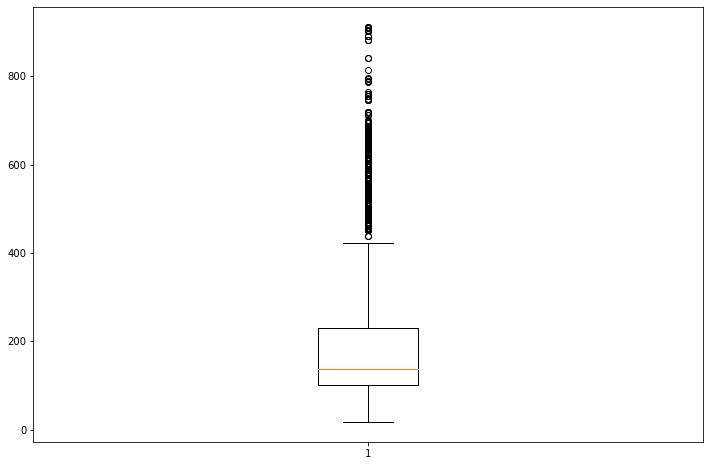

In [19]:
fig = plt.figure(figsize = (12,8))
plt.boxplot(dataset["Sales"])
plt.show()

17.0
423.0


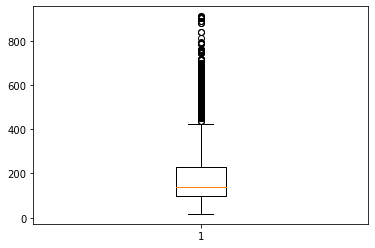

In [20]:
# to get minimun and maximun value of boxplot
B=plt.boxplot(dataset["Sales"])
for item in B["whiskers"]:
    print(item.get_ydata()[1])

### TO Remove Outlier

In [21]:
df=dataset[dataset["Sales"]<350]

### Box plot after removing outlier

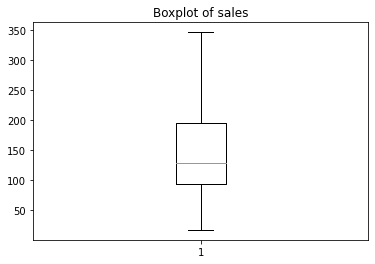

In [22]:
plt.boxplot(df["Sales"])
plt.title("Boxplot of sales")
plt.show()

## 2.Scatter plot

### scatter plot of Profit VS Margin

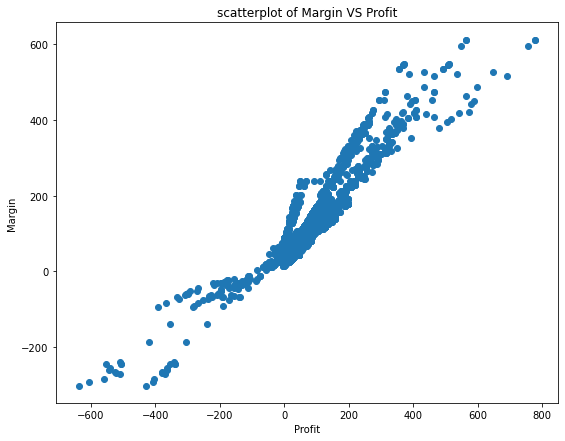

In [23]:
plt.figure(figsize=(9,7))
plt.scatter(dataset["Profit"],dataset["Margin"],)
plt.title("scatterplot of Margin VS Profit")
plt.xlabel("Profit")
plt.ylabel("Margin")
plt.show()

### scatter plot of  sales vs profit

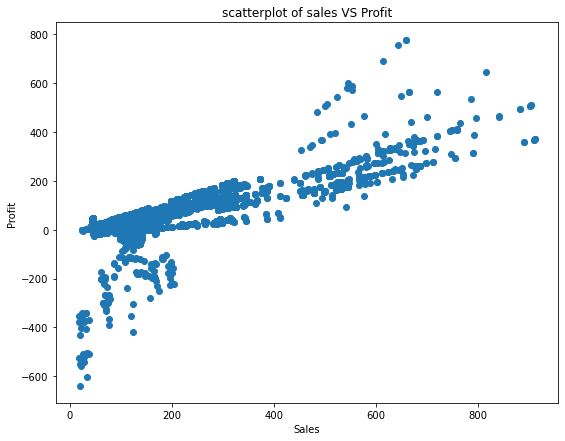

In [24]:
plt.figure(figsize=(9,7))
plt.scatter(dataset["Sales"],dataset["Profit"])
plt.title("scatterplot of sales VS Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

# 3 Histogram

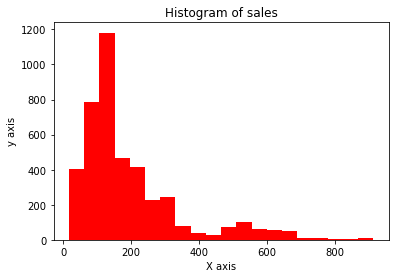

In [25]:
plt.hist(dataset["Sales"],bins=20,color='r')
plt.title("Histogram of sales")
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.show()

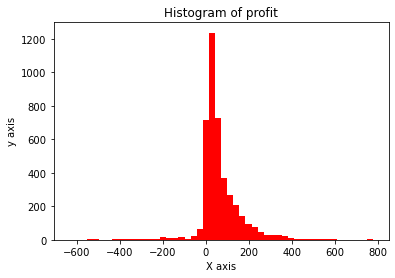

In [26]:
plt.hist(dataset["Profit"],bins=50,color='r')
plt.title("Histogram of profit")
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.show()

## 4 Bar plot

In [27]:
dataset["Product Type"].value_counts()

Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: Product Type, dtype: int64

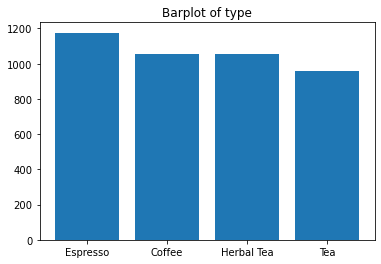

In [28]:
plt.bar(dataset["Product Type"].value_counts().index,dataset["Product Type"].value_counts().values)
plt.title("Barplot of type")
plt.show()

## 5 pie chart

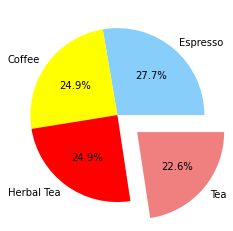

In [29]:
labels="Espresso","Coffee","Herbal Tea","Tea"
sizes=[1176,1056,1056,960]
colors=["lightskyblue","yellow","red","lightcoral"]
explode=(0,0,0,0.3)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct="%1.1f%%")
plt.show()

# Visualization using seaborn library

### 1. pairplot

In [30]:
import warnings
warnings.filterwarnings("ignore")

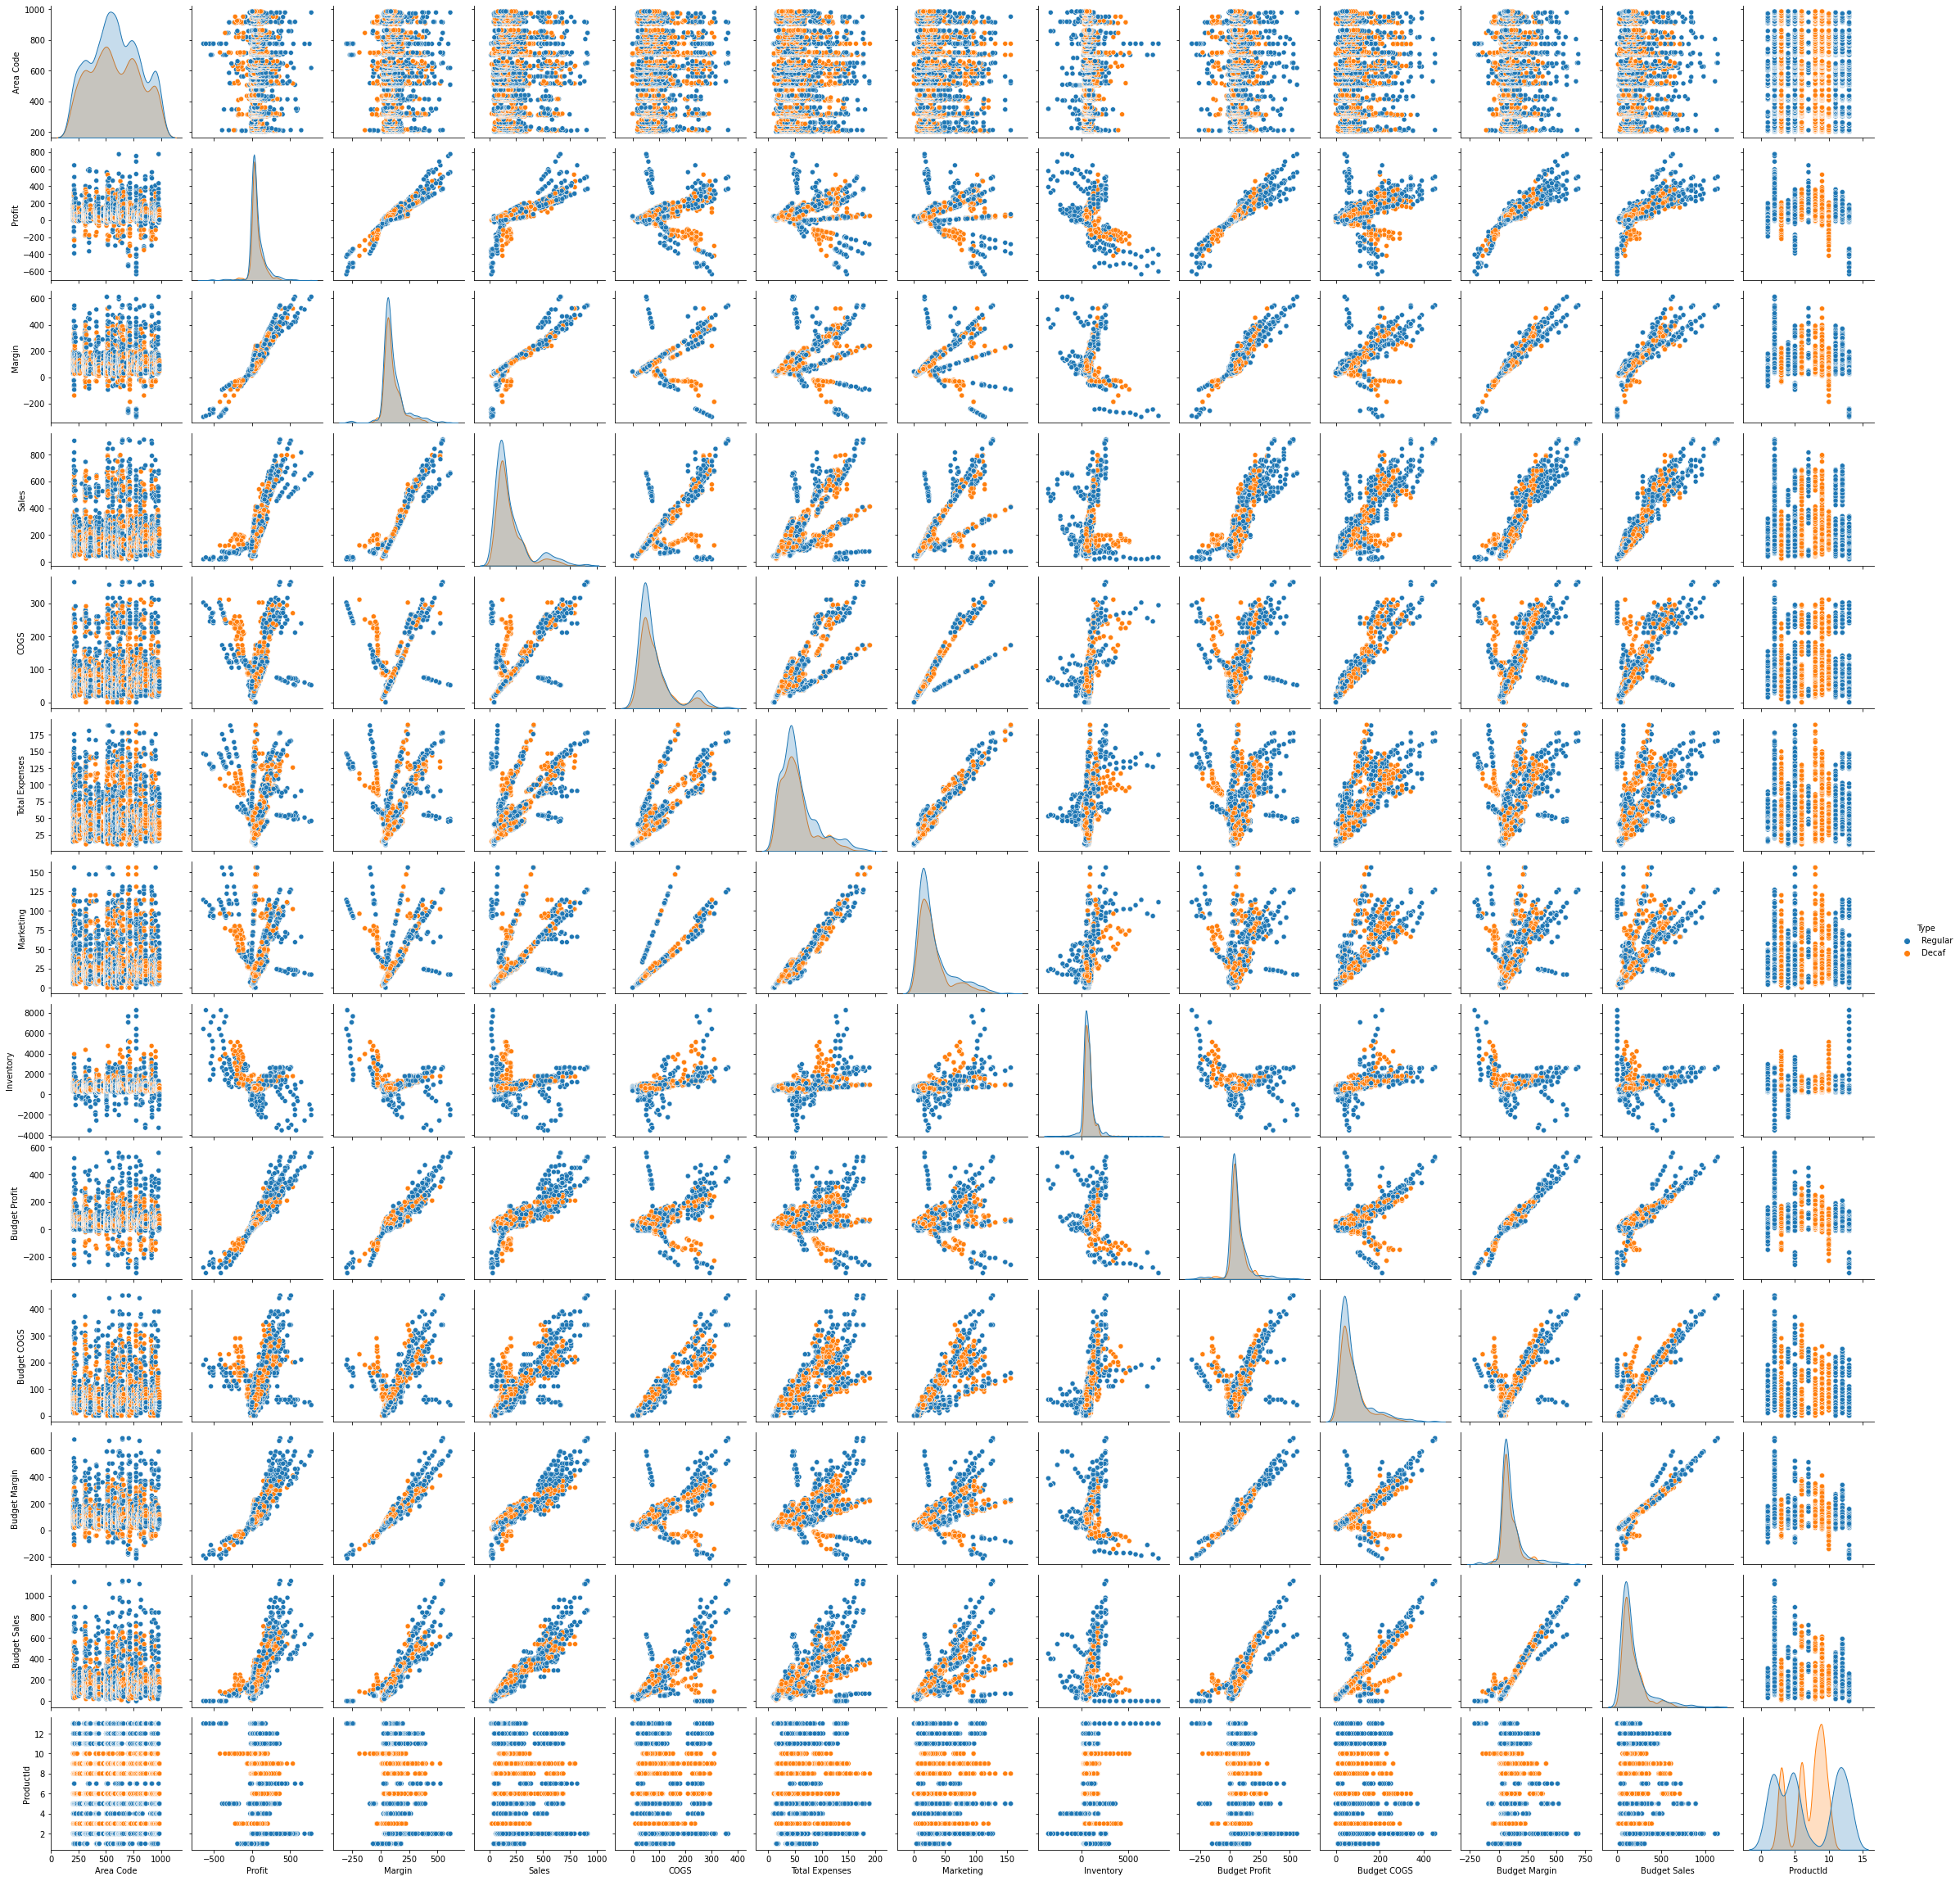

In [31]:
sns.pairplot(dataset ,hue='Type')
plt.show()

## joint plot

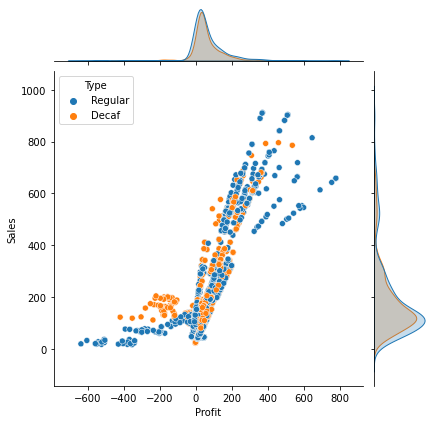

In [32]:
sns.jointplot("Profit","Sales",data=dataset,hue="Type",kind='scatter')
plt.show()

# Heat Map

Text(0.5, 1.0, 'Heatmap')

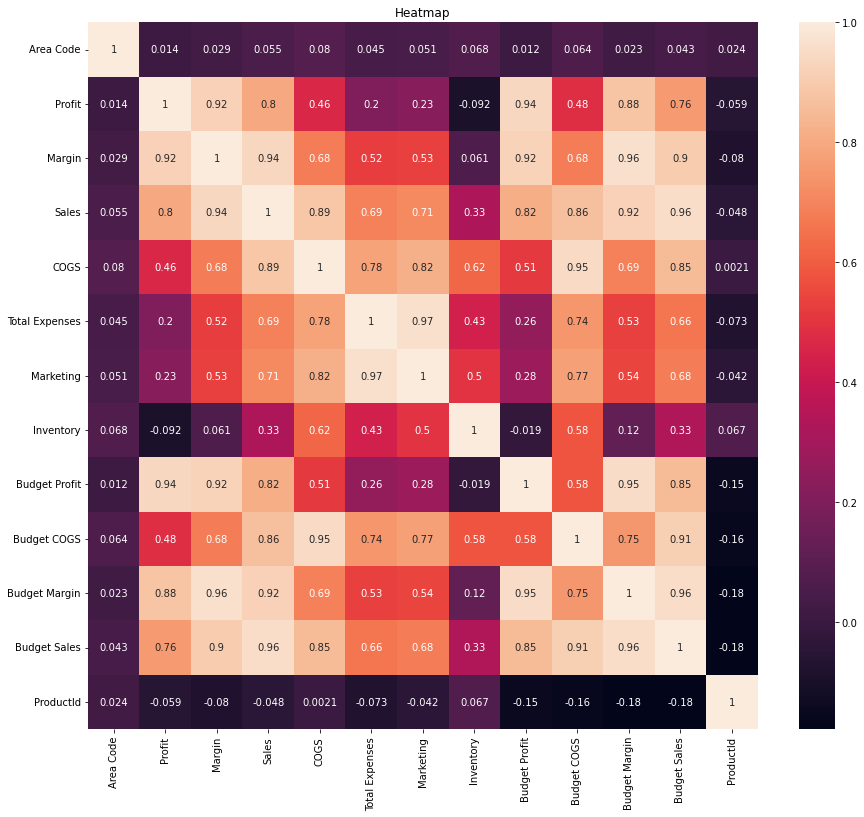

In [33]:
plt.figure(figsize=(15,13))
corrMatrix=dataset.corr()
sns.heatmap(corrMatrix,annot=True)
plt.title("Heatmap")

In [34]:
dataset.head()

Area Code        State Market   Market Size  Profit  Margin  Sales  COGS  \
0        203  Connecticut   East  Small Market     107     176    292   116   
1        203  Connecticut   East  Small Market      75     135    225    90   
2        203  Connecticut   East  Small Market     122     195    325   130   
3        203  Connecticut   East  Small Market     105     174    289   115   
4        203  Connecticut   East  Small Market     104     135    223    90   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              69         38        962            110          110   
1              60         29       1148             90           80   
2              73         42       1134            130          110   
3              69         37       1166            110          100   
4              56         29       1148             90           80   

   Budget Margin  Budget Sales  ProductId              Date Product Type  \
0            160           270          2  04-01-2010 00:00       Coffee   
1            130           210          2  07-01-2010 00:00       Coffee   
2            180           290          2  11-01-2010 00:00       Coffee   
3            160           260          2  12-01-2010 00:00       Coffee   
4            130           210          2  07-01-2011 00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

<AxesSubplot:xlabel='Sales', ylabel='Count'>

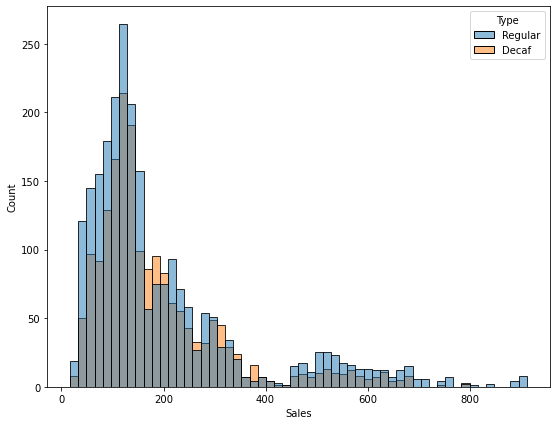

In [35]:
plt.figure(figsize=(9,7))
sns.histplot(x='Sales',data=dataset,hue='Type')

# ** Machine Learning **

types of machine learning

* 1.Supervised Machine Learning
* 2.Unsupervised Machine Learning
* 3.Reinforcemen Machine Learning

## 1. Supervised Machine Learning

* 1.Regression

* 2.Classification

## 1.Regression

## 1. Simple Linear Regression

In [36]:
dataset.head()

Area Code        State Market   Market Size  Profit  Margin  Sales  COGS  \
0        203  Connecticut   East  Small Market     107     176    292   116   
1        203  Connecticut   East  Small Market      75     135    225    90   
2        203  Connecticut   East  Small Market     122     195    325   130   
3        203  Connecticut   East  Small Market     105     174    289   115   
4        203  Connecticut   East  Small Market     104     135    223    90   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              69         38        962            110          110   
1              60         29       1148             90           80   
2              73         42       1134            130          110   
3              69         37       1166            110          100   
4              56         29       1148             90           80   

   Budget Margin  Budget Sales  ProductId              Date Product Type  \
0            160           270          2  04-01-2010 00:00       Coffee   
1            130           210          2  07-01-2010 00:00       Coffee   
2            180           290          2  11-01-2010 00:00       Coffee   
3            160           260          2  12-01-2010 00:00       Coffee   
4            130           210          2  07-01-2011 00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

In [37]:
x=dataset.iloc[:,5:6].values  #
y=dataset.iloc[:,6].values

In [38]:
x

array([[176],
       [135],
       [195],
       ...,
       [ 76],
       [ 87],
       [ 90]], dtype=int64)

## splitting the dataset for training and testing

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


## Training the Simple Linear Regression model on the Training set

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)

LinearRegression()

## Predicting the Test set results

In [41]:
y_pred=regressor.predict(x_test)

## Visualising the Training set results

Text(0, 0.5, 'sales')

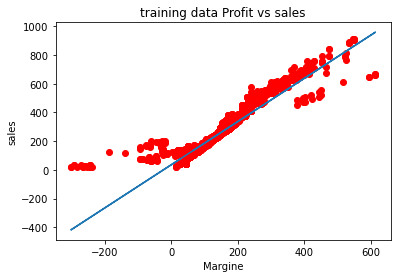

In [42]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train))
plt.title("training data Profit vs sales")
plt.xlabel("Margine")
plt.ylabel("sales")

## Visualising the Testing set results


Text(0, 0.5, 'sales')

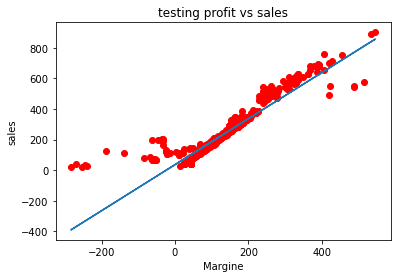

In [43]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,regressor.predict(x_test))
plt.title("testing profit vs sales")
plt.xlabel("Margine")
plt.ylabel("sales")

### Computing various types of errors (Evaluation metrics)

#### 1. Mean Squared Error (MSE)

In [147]:
from sklearn.metrics import mean_squared_error


In [148]:
print("mean square error",mean_squared_error(y_test,y_pred))

mean square error 45.277622565791816


#### 2. Root Mean Squared Error (RMSE)

In [149]:
print("Root mean square error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error 6.728864879442283


#### 3. Mean Absolute Error (MAE)

In [150]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error",mean_absolute_error(y_test,y_pred))

mean absolute error 4.345554805398888


#### 4. Mean Absolute Percentage Error (MAPE)

In [153]:
from sklearn.metrics import mean_absolute_percentage_error
print("mean absolute percent error",mean_absolute_percentage_error(y_test,y_pred)*100)

mean absolute percent error 3.0640583983929117


# 2 Multiple Linear Regression

In [44]:
dataset.head()

Area Code        State Market   Market Size  Profit  Margin  Sales  COGS  \
0        203  Connecticut   East  Small Market     107     176    292   116   
1        203  Connecticut   East  Small Market      75     135    225    90   
2        203  Connecticut   East  Small Market     122     195    325   130   
3        203  Connecticut   East  Small Market     105     174    289   115   
4        203  Connecticut   East  Small Market     104     135    223    90   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0              69         38        962            110          110   
1              60         29       1148             90           80   
2              73         42       1134            130          110   
3              69         37       1166            110          100   
4              56         29       1148             90           80   

   Budget Margin  Budget Sales  ProductId              Date Product Type  \
0            160           270          2  04-01-2010 00:00       Coffee   
1            130           210          2  07-01-2010 00:00       Coffee   
2            180           290          2  11-01-2010 00:00       Coffee   
3            160           260          2  12-01-2010 00:00       Coffee   
4            130           210          2  07-01-2011 00:00       Coffee   

     Product     Type  
0  Columbian  Regular  
1  Columbian  Regular  
2  Columbian  Regular  
3  Columbian  Regular  
4  Columbian  Regular

In [45]:
new_dataset=dataset.copy()

#converting all categorical values into numeric with the help of label encoder


In [46]:
#separation the data type columns [ object and numeric ]
cat=[]
num=[]
for i in new_dataset.columns:
    if new_dataset[i].dtypes=='O':         # 'o' is use as object means category
        cat.append(i)
    else:
        num.append(i)
data_cat=new_dataset[cat]    # new dataframe just type numeric
data_num=new_dataset[num]    # new dataframe just type object

In [47]:
data_cat.head()
data_cat.drop(["Date"],axis=1)

State Market   Market Size Product Type      Product     Type
0     Connecticut   East  Small Market       Coffee    Columbian  Regular
1     Connecticut   East  Small Market       Coffee    Columbian  Regular
2     Connecticut   East  Small Market       Coffee    Columbian  Regular
3     Connecticut   East  Small Market       Coffee    Columbian  Regular
4     Connecticut   East  Small Market       Coffee    Columbian  Regular
...           ...    ...           ...          ...          ...      ...
4243    Louisiana  South  Small Market     Espresso  Caffe Latte  Regular
4244    Louisiana  South  Small Market     Espresso  Caffe Latte  Regular
4245    Louisiana  South  Small Market     Espresso  Caffe Latte  Regular
4246    Louisiana  South  Small Market     Espresso  Caffe Latte  Regular
4247    Louisiana  South  Small Market     Espresso  Caffe Latte  Regular

[4248 rows x 6 columns]

In [48]:
data_num.head()

Area Code  Profit  Margin  Sales  COGS  Total Expenses  Marketing  \
0        203     107     176    292   116              69         38   
1        203      75     135    225    90              60         29   
2        203     122     195    325   130              73         42   
3        203     105     174    289   115              69         37   
4        203     104     135    223    90              56         29   

   Inventory  Budget Profit  Budget COGS  Budget Margin  Budget Sales  \
0        962            110          110            160           270   
1       1148             90           80            130           210   
2       1134            130          110            180           290   
3       1166            110          100            160           260   
4       1148             90           80            130           210   

   ProductId  
0          2  
1          2  
2          2  
3          2  
4          2

In [49]:
col=data_cat.columns
col

Index(['State', 'Market', 'Market Size', 'Date', 'Product Type', 'Product',
       'Type'],
      dtype='object')

In [50]:
label_encoders={}
categorical_columns = data_cat.columns

for columns in categorical_columns:
    label_encoders[columns]=LabelEncoder()
    data_cat[columns]=label_encoders[columns].fit_transform(data_cat[columns])

In [51]:
#merge 2 data set
frame=[data_cat,data_num]

In [52]:
dataset=pd.concat(frame,axis=1)
dataset.head()

State  Market  Market Size  Date  Product Type  Product  Type  Area Code  \
0      2       1            1     6             0        4     1        203   
1      2       1            1    12             0        4     1        203   
2      2       1            1    20             0        4     1        203   
3      2       1            1    22             0        4     1        203   
4      2       1            1    13             0        4     1        203   

   Profit  Margin  Sales  COGS  Total Expenses  Marketing  Inventory  \
0     107     176    292   116              69         38        962   
1      75     135    225    90              60         29       1148   
2     122     195    325   130              73         42       1134   
3     105     174    289   115              69         37       1166   
4     104     135    223    90              56         29       1148   

   Budget Profit  Budget COGS  Budget Margin  Budget Sales  ProductId  
0            110          110            160           270          2  
1             90           80            130           210          2  
2            130          110            180           290          2  
3            110          100            160           260          2  
4             90           80            130           210          2

In [53]:
x=dataset.drop(["Sales"],axis=1)
y=dataset["Sales"].values

## Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
y_train

array([230, 149, 127, ...,  50, 672,  48], dtype=int64)

## Training the Multiple Linear Regression model on the Training set


In [56]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set results

In [57]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=3)


In [58]:
#comparing predicted and testing result so it will get easy to compare

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[122.733 115.   ]
 [294.431 283.   ]
 [ 43.568  46.   ]
 ...
 [314.727 318.   ]
 [200.402 213.   ]
 [112.842 113.   ]]


# Coefficient of Determination or R-squared

In [59]:
predictions = regressor.predict(x)

In [60]:
regressor.score(x,y)

0.9981811440861939

In [61]:
from sklearn.metrics import r2_score
r_square=r2_score(y,predictions)
r_square

0.9981811440861939

# Adjusted R-squared

In [62]:
ss_error=sum((y-predictions)**2)                     # sum of square due to error
ss_total=sum((y-np.mean(y))**2)                               #total sum of square 
r_square=1-float((ss_error))/ss_total
adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-x.shape[1]-1)


In [63]:
adjusted_r_squared 

0.9981729704195992

# VIF

In [64]:
import statsmodels

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Adding a constant column for the intercept. 
X1 = add_constant(x)
vif = pd.Series([variance_inflation_factor(X1.values,idx) 
           for idx in range(X1.shape[1])],
          index=X1.columns)
print(vif)

const              48.149469
State               1.377560
Market              1.225013
Market Size         1.501880
Date                1.032430
Product Type       94.399461
Product             6.754852
Type                1.367227
Area Code           1.045279
Profit             22.355004
Margin             59.914424
COGS               35.836448
Total Expenses     31.984371
Marketing          20.131491
Inventory           3.034228
Budget Profit     129.015078
Budget COGS              inf
Budget Margin            inf
Budget Sales             inf
ProductId         116.299976
dtype: float64


# Feature selection techniques

In [110]:
dataset.head()


State  Market  Market Size  Date  Product Type  Product  Type  Area Code  \
0      2       1            1     6             0        4     1        203   
1      2       1            1    12             0        4     1        203   
2      2       1            1    20             0        4     1        203   
3      2       1            1    22             0        4     1        203   
4      2       1            1    13             0        4     1        203   

   Profit  Margin  Sales  COGS  Total Expenses  Marketing  Inventory  \
0     107     176    292   116              69         38        962   
1      75     135    225    90              60         29       1148   
2     122     195    325   130              73         42       1134   
3     105     174    289   115              69         37       1166   
4     104     135    223    90              56         29       1148   

   Budget Profit  Budget COGS  Budget Margin  Budget Sales  ProductId  
0            110          110            160           270          2  
1             90           80            130           210          2  
2            130          110            180           290          2  
3            110          100            160           260          2  
4             90           80            130           210          2

In [111]:
x = dataset.drop("Sales", 1) 
y = dataset['Sales']   
data=dataset
target=dataset["Sales"]


In [112]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs=SFS(LinearRegression(),
       k_features=(3,10),
        floating=False,
        forward=True,
        cv=0
       )

In [113]:
sfs.fit(x,y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(3, 10), scoring='r2')

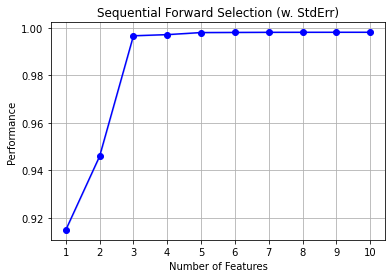

In [114]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [115]:
sfs.k_feature_names_

('Date',
 'Profit',
 'Margin',
 'COGS',
 'Total Expenses',
 'Marketing',
 'Inventory',
 'Budget Profit',
 'Budget COGS',
 'Budget Sales')

In [116]:
dataset.head()

State  Market  Market Size  Date  Product Type  Product  Type  Area Code  \
0      2       1            1     6             0        4     1        203   
1      2       1            1    12             0        4     1        203   
2      2       1            1    20             0        4     1        203   
3      2       1            1    22             0        4     1        203   
4      2       1            1    13             0        4     1        203   

   Profit  Margin  Sales  COGS  Total Expenses  Marketing  Inventory  \
0     107     176    292   116              69         38        962   
1      75     135    225    90              60         29       1148   
2     122     195    325   130              73         42       1134   
3     105     174    289   115              69         37       1166   
4     104     135    223    90              56         29       1148   

   Budget Profit  Budget COGS  Budget Margin  Budget Sales  ProductId  
0            110          110            160           270          2  
1             90           80            130           210          2  
2            130          110            180           290          2  
3            110          100            160           260          2  
4             90           80            130           210          2

In [126]:
x=dataset[['Date','Profit','Margin','COGS','Total Expenses','Marketing','Inventory','Budget Profit','Budget COGS','Budget Sales']]
y=dataset['Sales']

In [127]:
#splitting dataset for training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [128]:
#training multiplr linear regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [129]:
#predict test result
y_pred=reg.predict(x_test)
y_pred

array([123.223, 294.543,  43.417, ..., 314.95 , 200.411, 112.865])

In [130]:
y_test=y_test.values

In [131]:
#comparing prediction and test result

In [132]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[123.223 115.   ]
 [294.543 283.   ]
 [ 43.417  46.   ]
 ...
 [314.95  318.   ]
 [200.411 213.   ]
 [112.865 113.   ]]


In [136]:
predictions = reg.predict(x)
predictions

array([293.779, 227.567, 325.893, ..., 133.152, 153.171, 153.798])

In [143]:
reg.score(x,y)

0.9981732842414823

In [144]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
r_square

0.9979499280823872